In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Loading MNIST Dataset

In [5]:
(X_tn, y_train), (X_tt, y_test) = mnist.load_data()

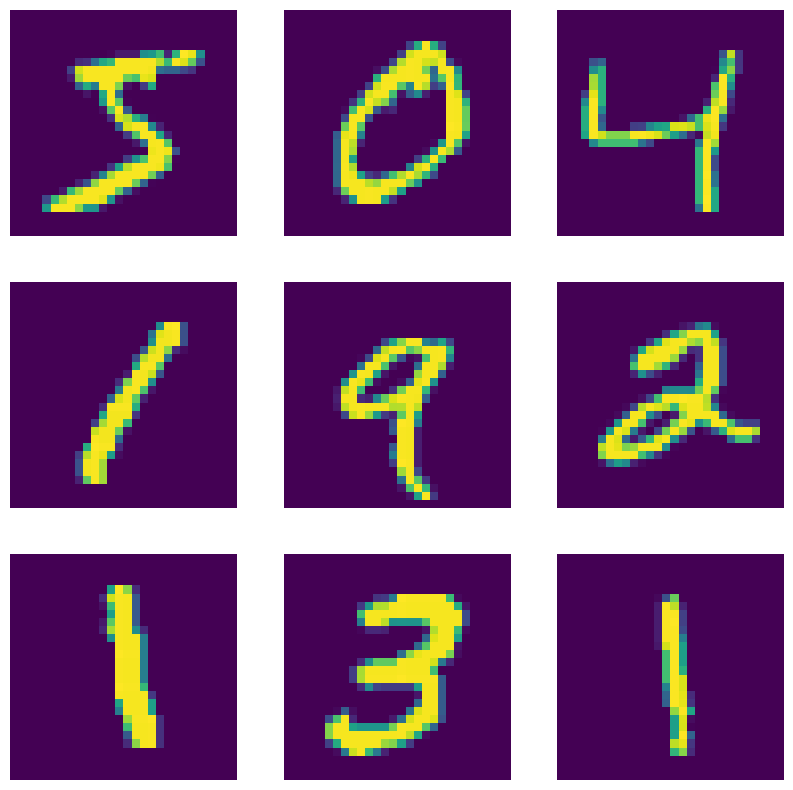

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(X_tn[i])
    plt.axis('off')

## Reshape the data to fit the model

In [10]:
X_train = X_tn.reshape(-1, 28 * 28)
X_test = X_tt.reshape(-1, 28 * 28)

## Normalize the pixel values

In [13]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## One-Hot Encoding of Labels

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Building the Model

In [24]:
model = Sequential([
    Input(shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [39]:
History = model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9970 - loss: 0.0098
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0066
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0063
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0072
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0056
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0064
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0052
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0054
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0069
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0071


## Model Evaluation

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.1140


In [43]:
print(f"Accuracy : {accuracy*100:0.2f} \nLoss : {loss}")

Accuracy : 98.38 
Loss : 0.09274798631668091


In [71]:
# Print text in red
print(f"\033[31mThis is red text\033[0m")

# Print text in green
print(f"\033[32mThis is green text\033[0m")

This is red text
This is green text


In [45]:
Pred_test = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Accuracy and Loss

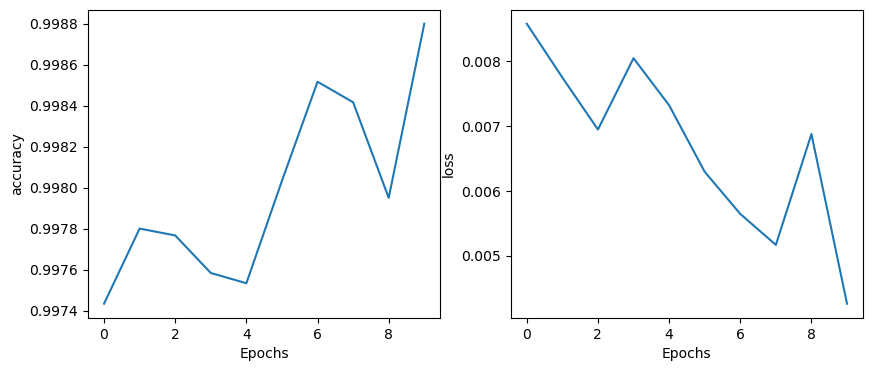

In [47]:
plt.figure(figsize=(10,4))
for idx, x in enumerate(list(History.history.keys())):
    ax = plt.subplot(1,2,idx+1)
    plt.plot(History.epoch, History.history[x], label=x)
    plt.xlabel('Epochs')
    plt.ylabel(x)
    # plt.axis('off')
plt.savefig('Images/FDD_Accuracy_Loss.png', bbox_inches='tight', pad_inches=0)
plt.show()

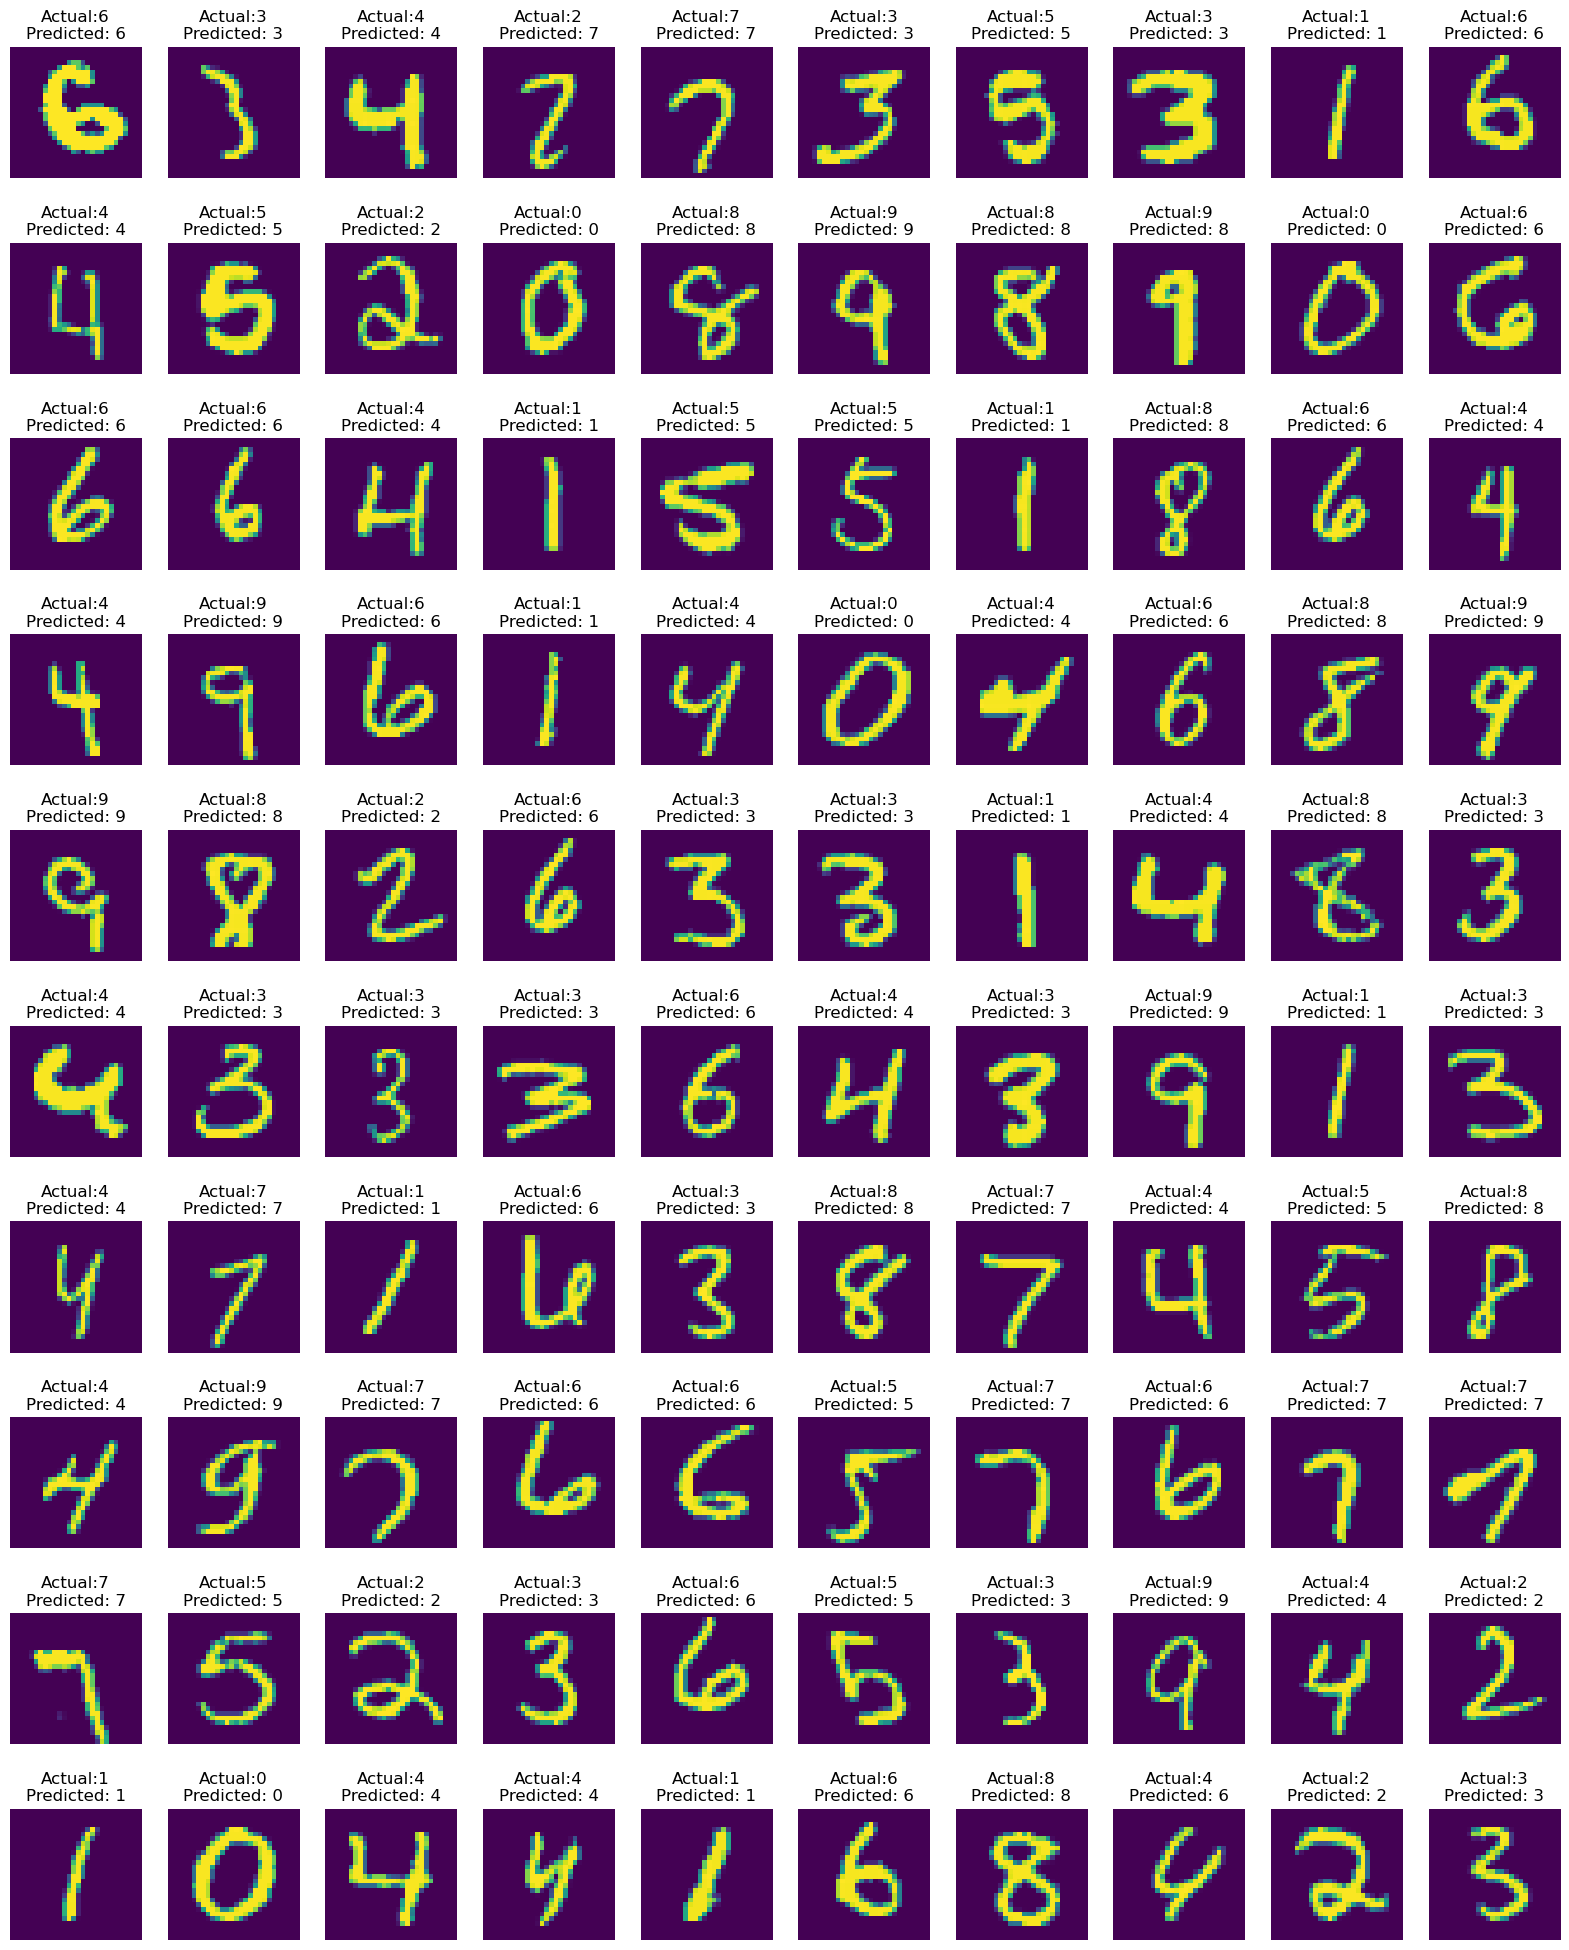

In [98]:
plt.figure(figsize=(20,25))
for i in range(100):
    ax = plt.subplot(10,10,i+1)
    j = random.randrange(6000)
    plt.title(f"Actual:{np.argmax(y_test[j])}\nPredicted: {np.argmax(Pred_test[j])}")
    plt.imshow(X_tt[j])
    plt.axis('off')
plt.savefig('Images/FDD_Prediction.png', bbox_inches='tight', pad_inches=0)
plt.show()

## Displaying Incorrect Predictions

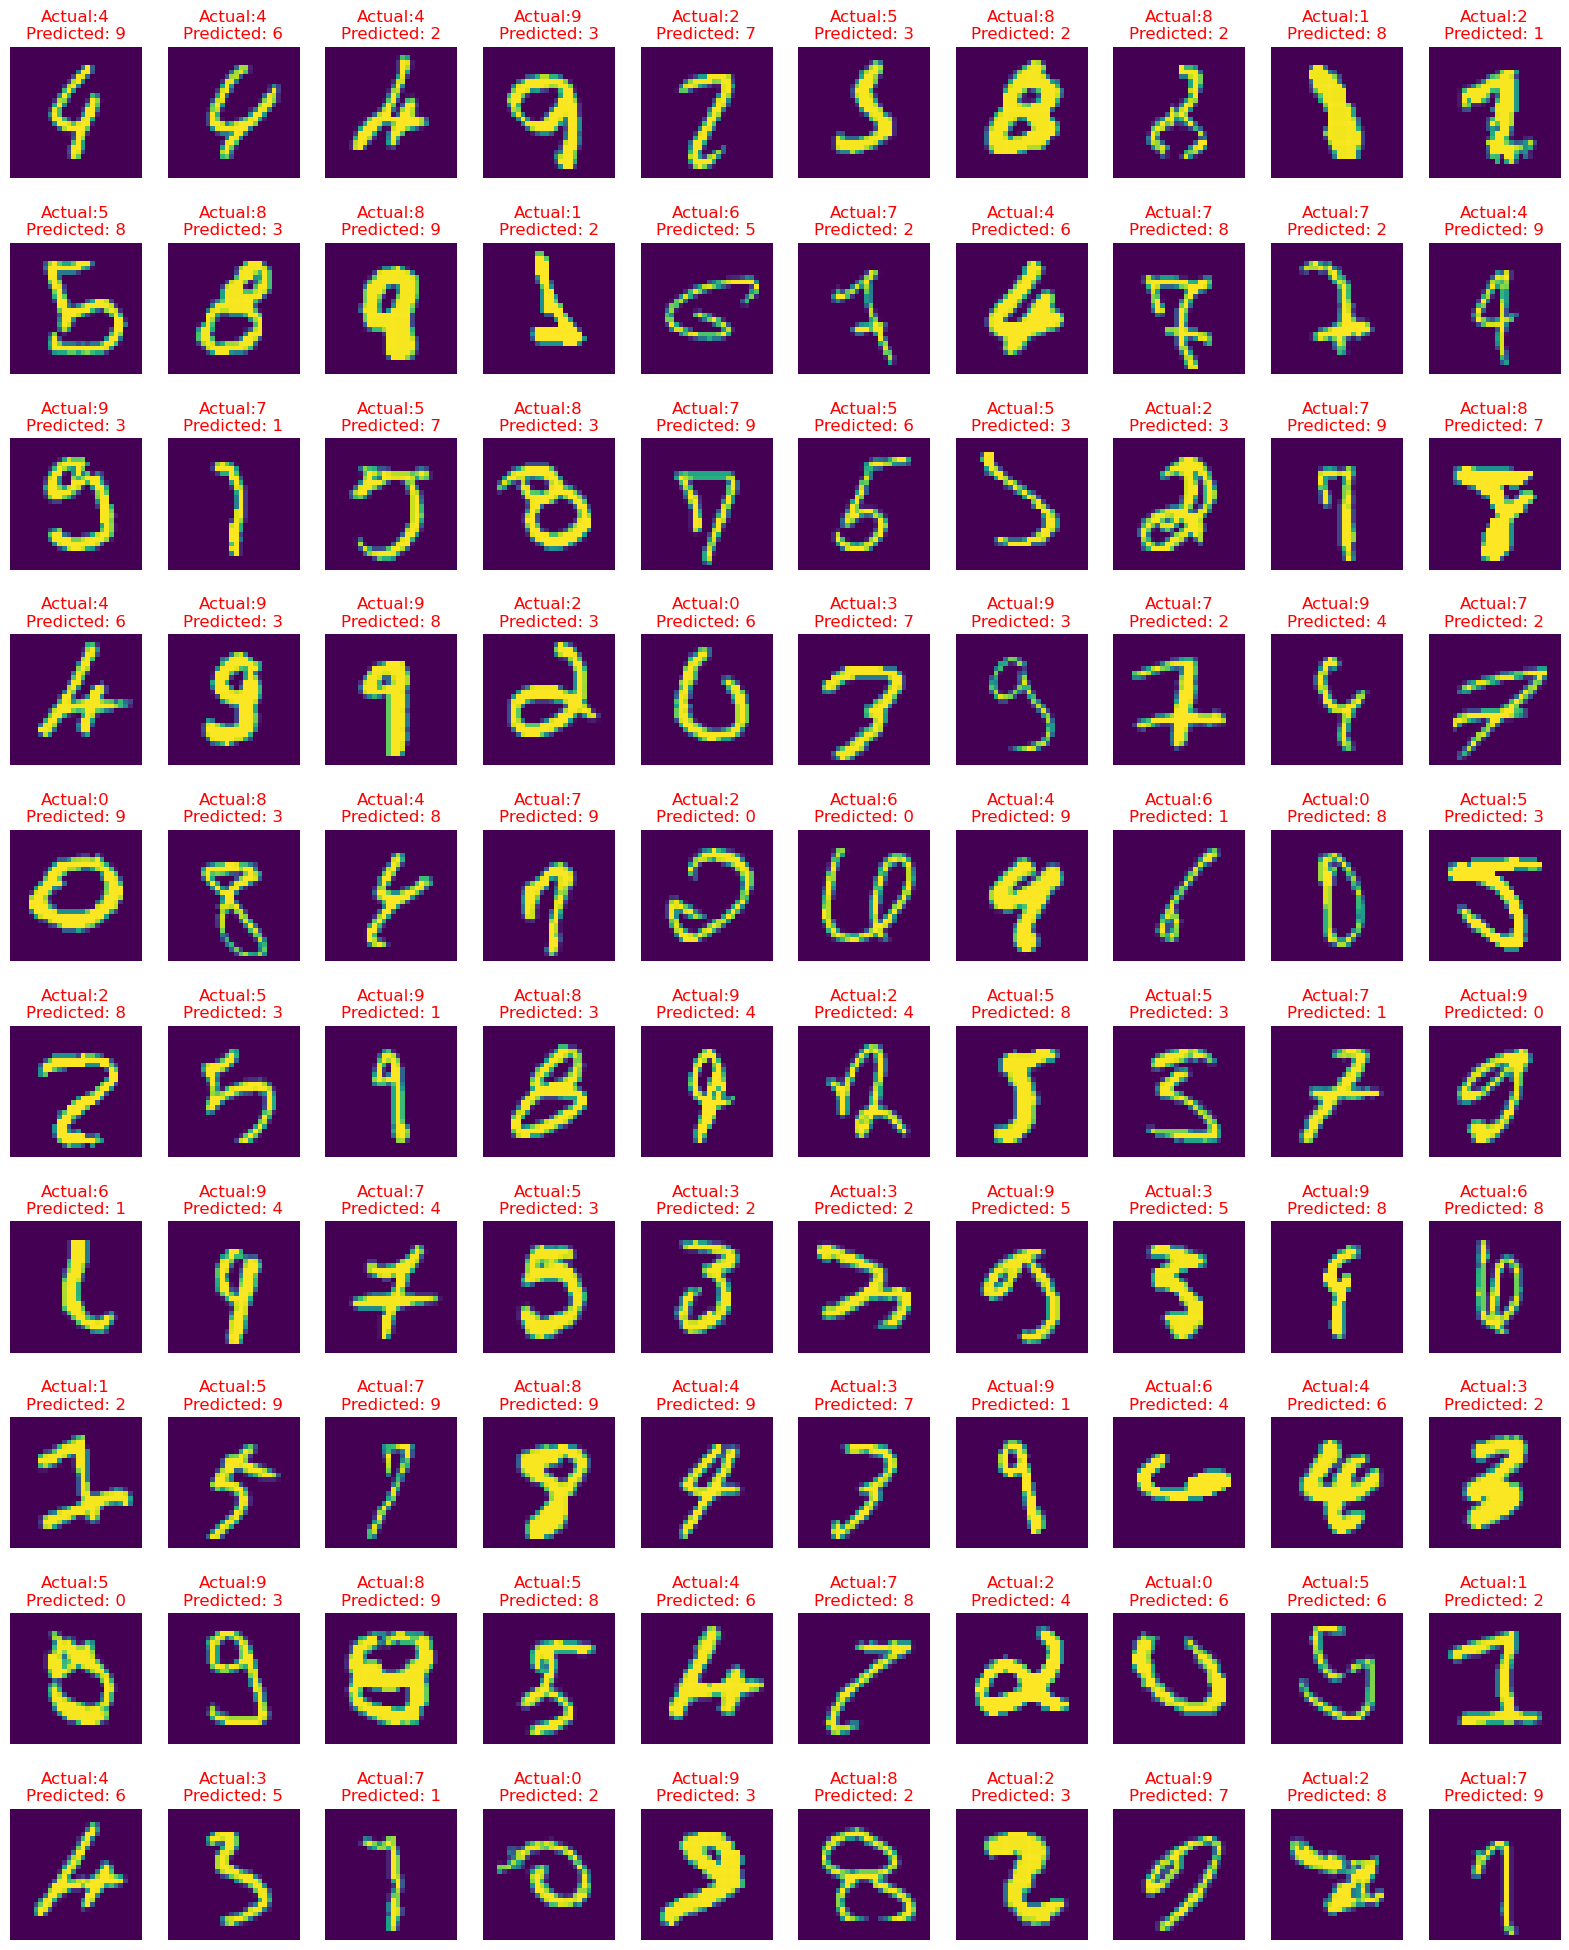

In [104]:
plt.figure(figsize=(20,25))
i=0
for j in range(10000):
    if(np.argmax(y_test[j])==np.argmax(Pred_test[j])):
        continue
    ax = plt.subplot(10,10,i+1)
    # j = random.randrange(6000)
    plt.title(f"Actual:{np.argmax(y_test[j])}\nPredicted: {np.argmax(Pred_test[j])}", color='red')
    plt.imshow(X_tt[j])
    plt.axis('off')
    i=i+1
    if i == 100:
        break
plt.savefig('Images/FDD_Incorrect_Prediction.png', bbox_inches='tight', pad_inches=0)
plt.show()

## Visuallizing Weights

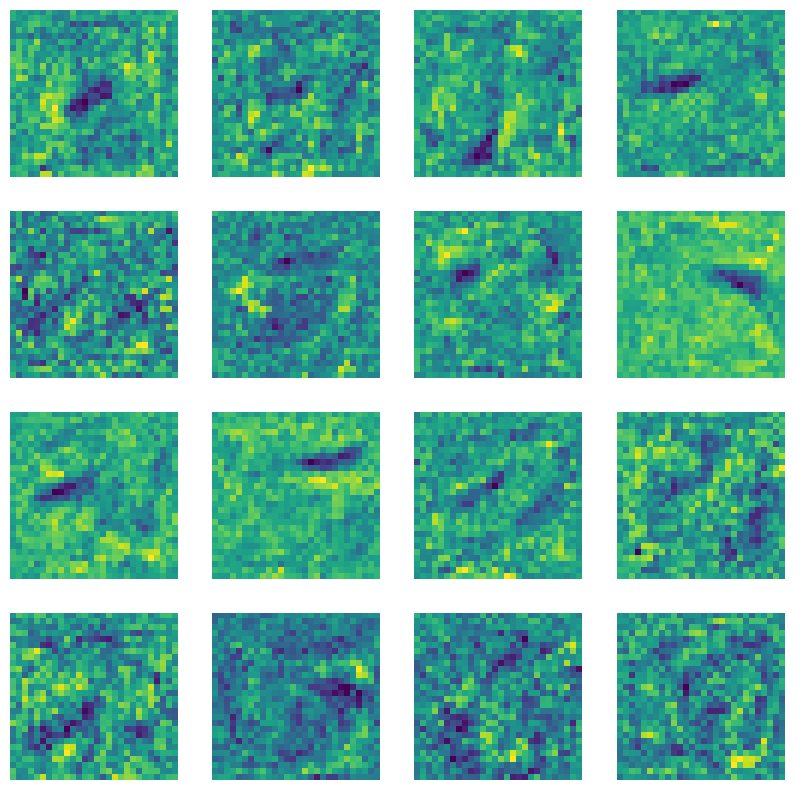

In [33]:
first_layer_weights = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    weight_image = first_layer_weights[:, i].reshape(28, 28)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

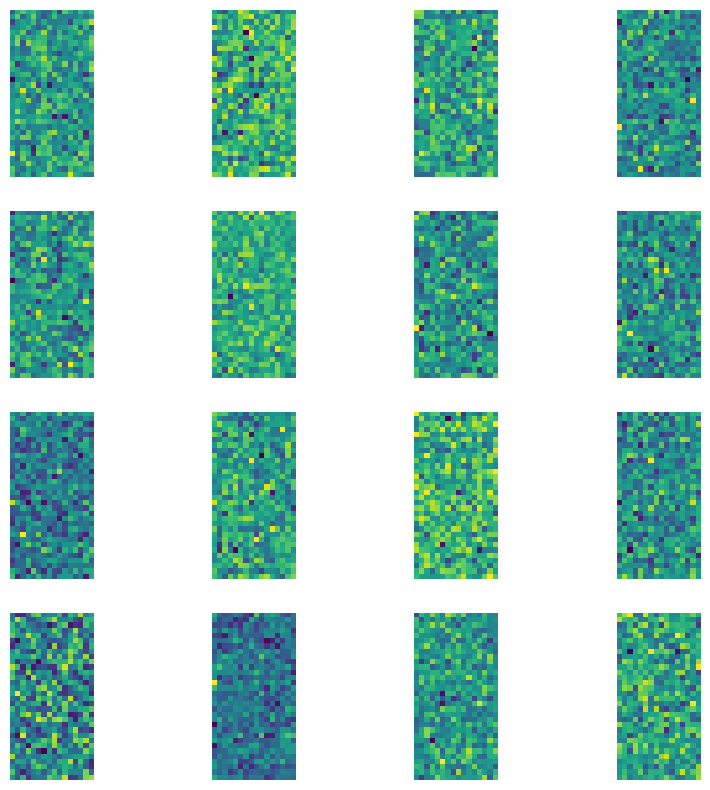

In [35]:
second_layer_weights = model.layers[1].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    weight_image = second_layer_weights[:, i].reshape(32, 16)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

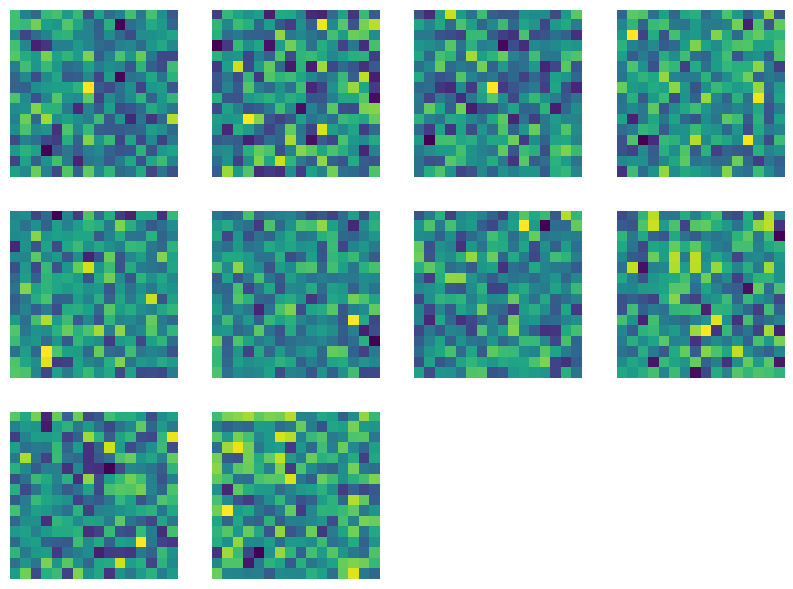

In [37]:
Third_layer_weights = model.layers[2].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 4, i+1)
    weight_image = Third_layer_weights[:, i].reshape(16, 16)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

## Saving the model

In [40]:
model.save('MNIST_DIGITS_FFD_MODEL.keras')